In [47]:
from keras.models import Sequential
from keras.layers import LSTM, TimeDistributed
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.layers.core import Flatten, Dense
from numpy import array, zeros
from math import sin
from math import pi, exp
from matplotlib import pyplot
from random import random, randint, uniform

In [48]:
#generate the next frame in the sequence
def next_frame(last_step, last_frame, column):
    #define the scope of the next step
    lower = max(0, last_step-1)
    upper = min(last_frame.shape[0]-1, last_step+1)
    #choose the row index for the next step
    step = randint(lower, upper)
    #copy the prior frame
    frame = last_frame.copy()
    #add the new step
    frame[step, column] = 1
    return frame, step

In [49]:
#generate a sequence of frames of a dot moving across an image
def build_frames(size):
    frames = list()
    #create the first frame
    frame = zeros((size, size))
    step = randint(0, size-1)
    #decide if we are heading left or right
    right = 1 if random() < 0.5 else 0
    col = 0 if right else size-1
    frame[step, col] = 1
    frames.append(frame)
    #create all remaining frames
    for i in range(1, size):
        col = i if right else size-1-i
        frame, step = next_frame(step, frame, col)
        frames.append(frame)
    return frames, right

In [52]:
#generate sequence of frames
size = 5
frames, right = build_frames(size)

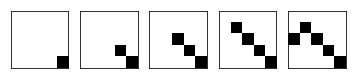

In [53]:
#plot all frames
pyplot.figure()
for i in range(size):
    #create a grayscale subplot for each frame
    pyplot.subplot(1, size, i+1)
    pyplot.imshow(frames[i], cmap='Greys')
    #turn of the scale to make it clearer
    ax = pyplot.gca()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
#show the plot
pyplot.show()

In [54]:
#generate multiple sequences of frames and reshape for network input
def generate_examples(size, n_patterns):
    X, y = list(), list()
    for _ in range(n_patterns):
        frames, right = build_frames(size)
        X.append(frames)
        y.append(right)
    #resize as [samples, timesteps, width, height, channels]
    X = array(X).reshape(n_patterns, size, size, size, 1)
    y = array(y).reshape(n_patterns, 1)
    return X,y

In [55]:
#configure problem
size = 50

In [56]:
#define the model
model = Sequential()
model.add(TimeDistributed(Conv2D(2, (2, 2), activation='relu'), input_shape=(None, size, size, 1)))
model.add(TimeDistributed(MaxPooling2D(pool_size=(2, 2))))
model.add(TimeDistributed(Flatten()))
model.add(LSTM(50))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['acc'])
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
time_distributed_1 (TimeDist (None, None, 49, 49, 2)   10        
_________________________________________________________________
time_distributed_2 (TimeDist (None, None, 24, 24, 2)   0         
_________________________________________________________________
time_distributed_3 (TimeDist (None, None, 1152)        0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 50)                240600    
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 51        
Total params: 240,661
Trainable params: 240,661
Non-trainable params: 0
_________________________________________________________________
None
